### **Importing relevant libraries.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import geopandas as gpd #powerful Python library built on top of Pandas designed to make working with geospatial data in Python easier
import rasterio as rio #for reading and writing geospatial raster data, specifically designed to work with formats such as GeoTIFF.

import pyogrio as pyg #Python library designed to handle geospatial data input/output operations. 
import fiona #Python library designed for reading and writing geospatial data in a variety of formats, particularly vector data formats like shapefiles, GeoJSON, and others

from geopandas import GeoDataFrame
from shapely.geometry import LineString, Point

import io

import shapely

### **1. Electricity Generation Data.**

#### **electicity_demand.csv**

In [2]:
#loading the dataset
electricity_demand = pd.read_csv("..\data\electricity_generation_data\electricity-demand.csv")

#displaying some rows
electricity_demand

,Entity,Code,Year,Electricity demand - TWh
0,ASEAN (Ember),NaN,2000,378.61
1,ASEAN (Ember),NaN,2001,404.85
2,ASEAN (Ember),NaN,2002,433.19
3,ASEAN (Ember),NaN,2003,458.24
4,ASEAN (Ember),NaN,2004,496.56
...,...,...,...,...
5858,Zimbabwe,ZWE,2018,10.46
5859,Zimbabwe,ZWE,2019,9.60
5860,Zimbabwe,ZWE,2020,8.69
5861,Zimbabwe,ZWE,2021,10.20


In [3]:
#Filtering to get Kenya alone
ke_electricity_demand = electricity_demand.query("Code=='KEN'")

#diplaying first few rows
ke_electricity_demand.head()

,Entity,Code,Year,Electricity demand - TWh
2784,Kenya,KEN,2000,4.51
2785,Kenya,KEN,2001,4.98
2786,Kenya,KEN,2002,5.37
2787,Kenya,KEN,2003,5.67
2788,Kenya,KEN,2004,6.32


<Axes: xlabel='Year'>

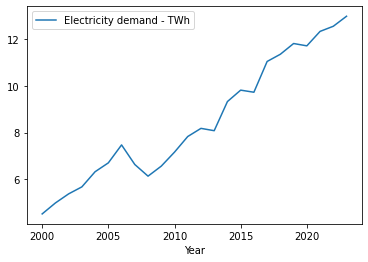

In [4]:
ke_electricity_demand.plot(x='Year', y='Electricity demand - TWh')

In [5]:
ke_electricity_demand.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 2784 to 2807
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Entity                    24 non-null     object 
 1   Code                      24 non-null     object 
 2   Year                      24 non-null     int64  
 3   Electricity demand - TWh  24 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 960.0+ bytes


In [6]:
ke_electricity_demand.describe()

,Year,Electricity demand - TWh
count,24.000000,24.000000
mean,2011.500000,8.512917
std,7.071068,2.653732
min,2000.000000,4.510000
25%,2005.750000,6.500000
50%,2011.500000,7.955000
75%,2017.250000,11.127500
max,2023.000000,12.990000


In [7]:
ke_electricity_demand.columns

Index(['Entity', 'Code', 'Year', 'Electricity demand - TWh'], dtype='object')

In [8]:
ke_electricity_demand.shape

(24, 4)

In [9]:
# Check for null values in each column
null_values = ke_electricity_demand.isnull().sum()
null_values

Entity                      0
Code                        0
Year                        0
Electricity demand - TWh    0
dtype: int64

#### **electricity_generation.csv**

In [10]:
#loading the dataset
electricity_generation = pd.read_csv("..\data\electricity_generation_data\electricity-generation.csv")

#displaying some rows
electricity_generation

,Entity,Code,Year,Electricity generation - TWh
0,ASEAN (Ember),NaN,2000,378.61
1,ASEAN (Ember),NaN,2001,404.85
2,ASEAN (Ember),NaN,2002,433.19
3,ASEAN (Ember),NaN,2003,458.24
4,ASEAN (Ember),NaN,2004,496.56
...,...,...,...,...
7407,Zimbabwe,ZWE,2018,9.44
7408,Zimbabwe,ZWE,2019,8.49
7409,Zimbabwe,ZWE,2020,6.71
7410,Zimbabwe,ZWE,2021,8.46


In [11]:
#filtering to get Kenya alone
ke_electricity_generation = electricity_generation.query("Code=='KEN'")

#displaying first few rows
ke_electricity_generation.head()

,Entity,Code,Year,Electricity generation - TWh
3501,Kenya,KEN,2000,4.31
3502,Kenya,KEN,2001,4.81
3503,Kenya,KEN,2002,5.15
3504,Kenya,KEN,2003,5.48
3505,Kenya,KEN,2004,6.16


<Axes: xlabel='Year'>

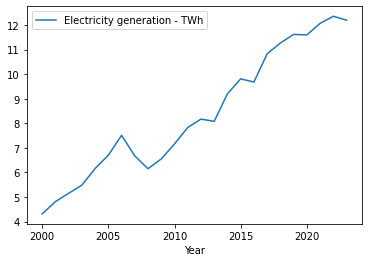

In [12]:
ke_electricity_generation.plot(x='Year', y='Electricity generation - TWh')

In [13]:
ke_electricity_generation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 3501 to 3524
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Entity                        24 non-null     object 
 1   Code                          24 non-null     object 
 2   Year                          24 non-null     int64  
 3   Electricity generation - TWh  24 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 960.0+ bytes


In [14]:
ke_electricity_generation.describe()

,Year,Electricity generation - TWh
count,24.000000,24.000000
mean,2011.500000,8.390417
std,7.071068,2.583438
min,2000.000000,4.310000
25%,2005.750000,6.452500
50%,2011.500000,7.955000
75%,2017.250000,10.940000
max,2023.000000,12.360000


In [15]:
ke_electricity_generation.columns

Index(['Entity', 'Code', 'Year', 'Electricity generation - TWh'], dtype='object')

In [16]:
ke_electricity_generation.shape

(24, 4)

In [17]:
# Check for null values in each column
null_values = ke_electricity_generation.isnull().sum()
null_values

Entity                          0
Code                            0
Year                            0
Electricity generation - TWh    0
dtype: int64

##### **Merging Kenya electricity demand and Kenya electricity generation on YEAR column**

In [18]:
merged_df = pd.merge(ke_electricity_demand, ke_electricity_generation, on=['Year', 'Code', 'Entity'], how='inner')
merged_df.head()

,Entity,Code,Year,Electricity demand - TWh,Electricity generation - TWh
0,Kenya,KEN,2000,4.51,4.31
1,Kenya,KEN,2001,4.98,4.81
2,Kenya,KEN,2002,5.37,5.15
3,Kenya,KEN,2003,5.67,5.48
4,Kenya,KEN,2004,6.32,6.16


<Axes: xlabel='Year'>

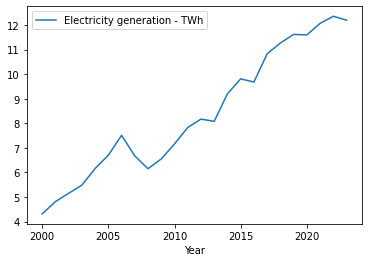

In [19]:
merged_df.plot(x='Year', y='Electricity generation - TWh')

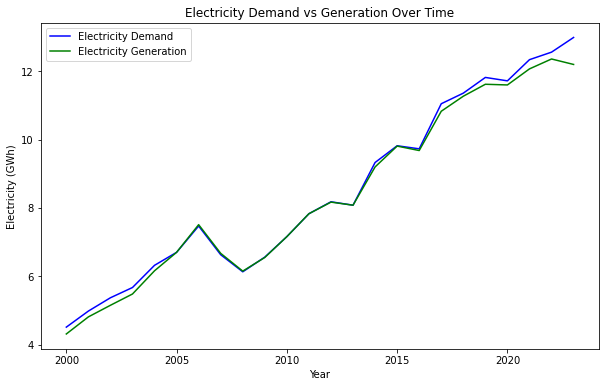

In [20]:
plt.figure(figsize=(10, 6))

# Plot electricity demand over time
plt.plot(merged_df['Year'], merged_df['Electricity demand - TWh'], label='Electricity Demand', color='blue')

# Plot electricity generation over time
plt.plot(merged_df['Year'], merged_df['Electricity generation - TWh'], label='Electricity Generation', color='green')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Electricity (GWh)')
plt.title('Electricity Demand vs Generation Over Time')
plt.legend()

# Display the plot
plt.show()

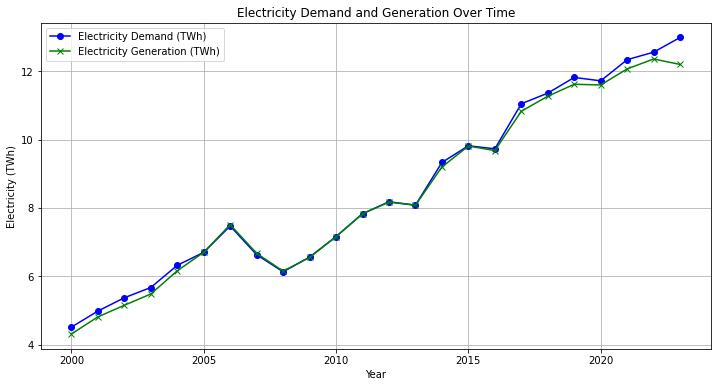

In [21]:

# Extract the relevant columns for plotting
years_demand = ke_electricity_demand['Year']
demand_values = ke_electricity_demand['Electricity demand - TWh']

years_generation = ke_electricity_generation['Year']
generation_values = ke_electricity_generation['Electricity generation - TWh']

# Plotting demand and generation over time
plt.figure(figsize=(12, 6))
plt.plot(years_demand, demand_values, label='Electricity Demand (TWh)', color='blue', marker='o')
plt.plot(years_generation, generation_values, label='Electricity Generation (TWh)', color='green', marker='x')

# Adding title and labels
plt.title('Electricity Demand and Generation Over Time')
plt.xlabel('Year')
plt.ylabel('Electricity (TWh)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

### **2. Grid Infrastrucure Data.**

#### **global_1_1_1_1_1_0.tif**

### Reading the .tif file and inspect its metadata

In [22]:
# Define file path
file_path = r'C:\Users\User\Documents\Energy-Access-and-Electrification-planning\data\grid_infrustructure_data\global_data\global_1_1_1_1_1_0.tif'

# Open the .tif file using rasterio
with rio.open(file_path) as src:
    raster_data = src.read(1)  # Read the first band
    profile = src.profile     # Get metadata for the file
    print(profile)            # Print profile for metadata inspection

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 0.0, 'width': 24527, 'height': 8674, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.009999999999999998, 0.0, -89.335692917,
       0.0, -0.01, 51.90425168), 'blockysize': 1, 'tiled': False, 'compress': 'deflate', 'interleave': 'band'}


### Handling NoData

In [23]:
# Get NoData value from the metadata
nodata_value = profile.get('nodata', -9999)

# Find and count NoData values in the array
nodata_count = np.sum(raster_data == nodata_value)
print(f"NoData values count: {nodata_count}")

NoData values count: 208511919


### Replacing NoData with np.nan or a default value

In [24]:
# Replace NoData values with np.nan for easier handling
raster_data = np.where(raster_data == nodata_value, np.nan, raster_data)

# Optional: Normalize the data if necessary
raster_data_normalized = (raster_data - np.nanmin(raster_data)) / (np.nanmax(raster_data) - np.nanmin(raster_data))

In [25]:
print("Mean:", np.nanmean(raster_data))
print("Median:", np.nanmedian(raster_data))
print("Standard Deviation:", np.nanstd(raster_data))

Mean: 8.569723269706671
Median: 3.0
Standard Deviation: 23.918133864040858


#### Visualizing the data

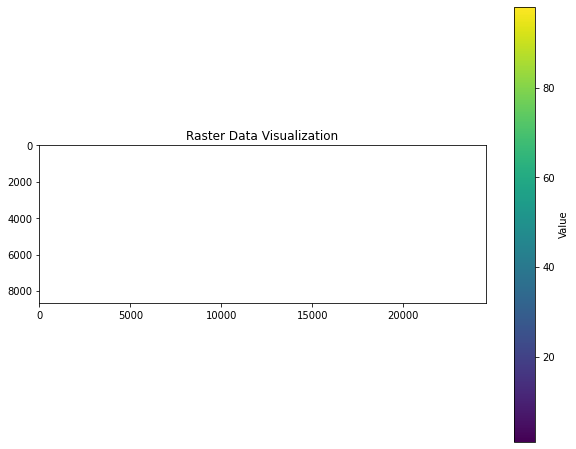

In [26]:
plt.figure(figsize=(10, 8))
plt.imshow(raster_data, cmap='viridis')  # Change cmap as needed
plt.colorbar(label="Value")
plt.title("Raster Data Visualization")
plt.show()

#### Masking Data: You can mask certain areas of the raster based on specific conditions, such as areas below a certain threshold.



In [27]:
# Masking values below a certain threshold (e.g., 100)
threshold = 100
masked_data = np.where(raster_data < threshold, np.nan, raster_data)
masked_data

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

#### Smoothing: Applying a smoothing filter can help reduce noise in the raster data.



In [28]:
from scipy.ndimage import gaussian_filter

# Smooth the raster data
smoothed_data = gaussian_filter(masked_data, sigma=1)
smoothed_data

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

#### Resampling: If you want to change the resolution of the raster data, you can resample it. For this, you can use rasterio and rasterio.enums for specifying the resampling method.

In [29]:
from rasterio.enums import Resampling

# Resample the data to half the resolution
new_shape = (int(src.height / 2), int(src.width / 2))

with rio.open(file_path) as src:
    data_resampled = src.read(
        out_shape=new_shape,
        resampling=Resampling.bilinear
    )

### Histogram of Raster Values

A histogram provides insight into the distribution of values within the raster data.

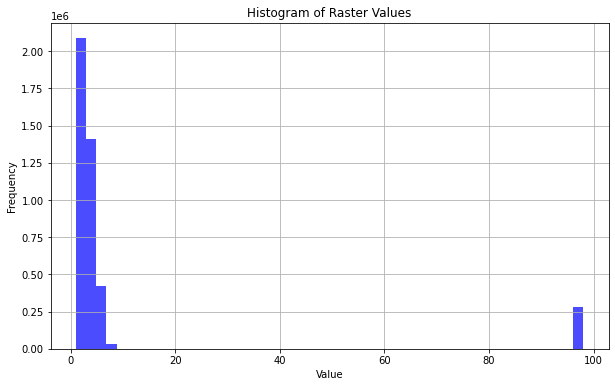

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(raster_data[~np.isnan(raster_data)], bins=50, color='blue', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Raster Values')
plt.grid()
plt.show()

### Box Plot
A box plot is useful to visualize the spread and identify potential outliers.

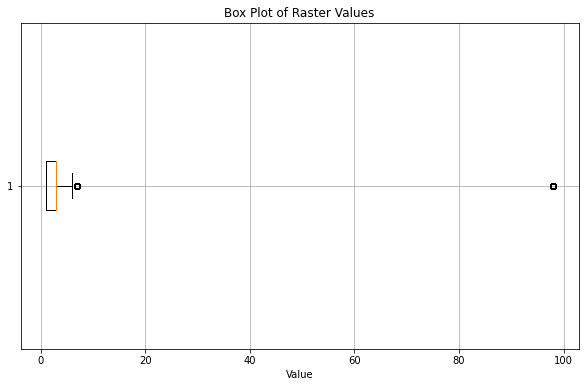

In [31]:
plt.figure(figsize=(10, 6))
plt.boxplot(raster_data[~np.isnan(raster_data)], vert=False)
plt.xlabel('Value')
plt.title('Box Plot of Raster Values')
plt.grid()
plt.show()

###  Contouring
You can create contour lines to visualize the data's variations more clearly.

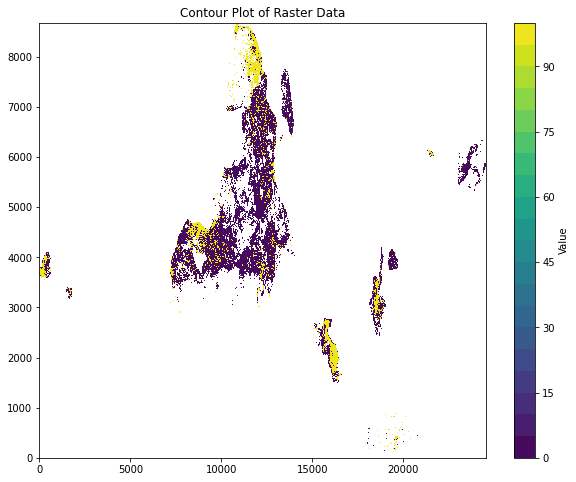

In [32]:
plt.figure(figsize=(10, 8))
plt.contourf(raster_data, cmap='viridis', levels=20)
plt.colorbar(label="Value")
plt.title("Contour Plot of Raster Data")
plt.show()

### Change in Visualization Over Time (If Applicable)
If your data has a time component, you can visualize changes over time using animations.

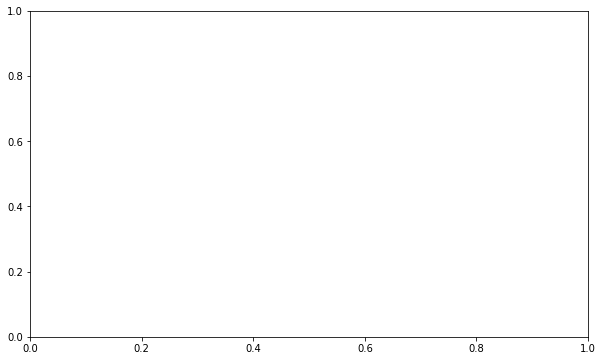

In [33]:
import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=(10, 6))

def update(frame):
    ax.clear()
    ax.imshow(raster_data[frame], cmap='viridis')
    ax.set_title(f"Year: {frame}")
    ax.axis('off')

ani = animation.FuncAnimation(fig, update, frames=range(raster_data.shape[0]), repeat=True)
plt.show()

### 3D Surface Plot
If you want to visualize the raster in three dimensions:

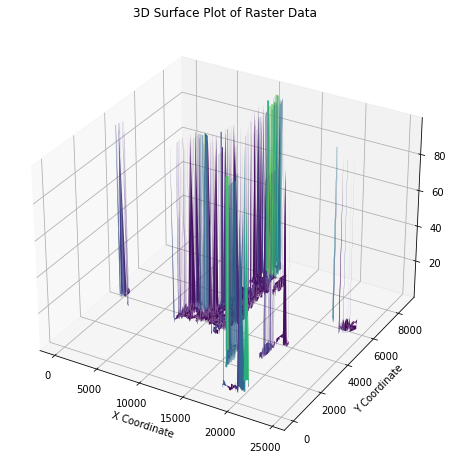

In [34]:
from mpl_toolkits.mplot3d import Axes3D

x = np.arange(raster_data.shape[1])
y = np.arange(raster_data.shape[0])
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, raster_data, cmap='viridis', edgecolor='none')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Value')
ax.set_title('3D Surface Plot of Raster Data')
plt.show()

### Save Processed Data
If you need to save the processed data, you can use rasterio to export it back to a .tif:

In [35]:
output_path = r'C:\Users\User\Documents\Energy-Access-and-Electrification-planning\data\grid_infrustructure_data\global_data\global_1_1_1_1_1_0.tif'
with rio.open(output_path, 'w', **profile) as dst:
    dst.write(raster_data, 1)

c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\numpy\core\_asarray.py:130: RuntimeWarning: invalid value encountered in cast
  arr = array(a, dtype=dtype, order=order, copy=False, subok=subok)


In [36]:
import rasterio

# Open the TIFF file
with rasterio.open(r"C:\Users\User\Documents\Energy-Access-and-Electrification-planning\data\grid_infrustructure_data\global_data\global_1_1_1_1_1_0.tif") as src:
    # Print metadata
    print("Metadata:", src.meta)
    
    # Print dimensions (height and width) and number of bands
    print("Dimensions (Height x Width):", src.height, "x", src.width)
    print("Number of Bands:", src.count)
    
    # Print coordinate reference system (CRS)
    print("Coordinate Reference System (CRS):", src.crs)
    
    # Print affine transformation (mapping coordinates to array indices)
    print("Affine Transformation:", src.transform)

    # Read the first band and print a portion of pixel values as an example
    band1 = src.read(1)  # Read the first band
    print("Sample Pixel Values (Top-left corner):\n", band1[:5, :5])


Metadata: {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 0.0, 'width': 24527, 'height': 8674, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.009999999999999998, 0.0, -89.335692917,
       0.0, -0.01, 51.90425168)}
Dimensions (Height x Width): 8674 x 24527
Number of Bands: 1
Coordinate Reference System (CRS): EPSG:4326
Affine Transformation: | 0.01, 0.00,-89.34|
| 0.00,-0.01, 51.90|
| 0.00, 0.00, 1.00|
Sample Pixel Values (Top-left corner):
 [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


In [37]:
# Get NoData value from the metadata
nodata_value = profile.get('nodata', -9999)

# Find and count NoData values in the array
nodata_count = np.sum(raster_data == nodata_value)
print(f"NoData values count: {nodata_count}")

NoData values count: 0


### **3. Income Level Data**

#### **GSAP_AM24_2021. (shape index)**

In [38]:
ke_counties = gpd.read_file('..\data\income_level_data\GSAP_AM24_2021.shp', engine='pyogrio',
                                   where="code='KEN'")

In [39]:
ke_counties.head()

,code,geo_year,geo_source,geo_level,geo_idvar,geo_id,geo_nvar,geo_name,geo_code,geometry
0,KEN,2022.0,GADM,1,GID_1,KEN.1_1,NAME_1,Baringo,KEN_2022_GADM1_KEN.1_1,"MULTIPOLYGON (((35.73880 -0.19544, 35.72428 -0..."
1,KEN,2022.0,GADM,1,GID_1,KEN.2_1,NAME_1,Bomet,KEN_2022_GADM1_KEN.2_1,"POLYGON ((35.26033 -1.01608, 35.26021 -1.01621..."
2,KEN,2022.0,GADM,1,GID_1,KEN.3_1,NAME_1,Bungoma,KEN_2022_GADM1_KEN.3_1,"POLYGON ((34.91305 0.85131, 34.91327 0.85148, ..."
3,KEN,2022.0,GADM,1,GID_1,KEN.4_1,NAME_1,Busia,KEN_2022_GADM1_KEN.4_1,"POLYGON ((34.02698 -0.01568, 34.02082 -0.02018..."
4,KEN,2022.0,GADM,1,GID_1,KEN.5_1,NAME_1,Elgeyo-Marakwet,KEN_2022_GADM1_KEN.5_1,"MULTIPOLYGON (((35.53068 0.22495, 35.53475 0.2..."


<Axes: >

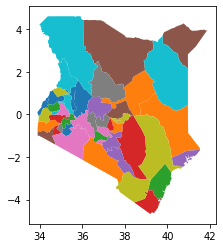

In [40]:
ke_counties.plot(column='geo_name')

In [41]:
ke_counties.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   code        47 non-null     object  
 1   geo_year    47 non-null     float64 
 2   geo_source  47 non-null     object  
 3   geo_level   47 non-null     object  
 4   geo_idvar   47 non-null     object  
 5   geo_id      47 non-null     object  
 6   geo_nvar    47 non-null     object  
 7   geo_name    47 non-null     object  
 8   geo_code    47 non-null     object  
 9   geometry    47 non-null     geometry
dtypes: float64(1), geometry(1), object(8)
memory usage: 3.8+ KB


In [42]:
ke_counties.describe()

,geo_year
count,47.0
mean,2022.0
std,0.0
min,2022.0
25%,2022.0
50%,2022.0
75%,2022.0
max,2022.0


In [43]:
# Check for null values in each column
null_values = ke_counties.isnull().sum()
null_values

code          0
geo_year      0
geo_source    0
geo_level     0
geo_idvar     0
geo_id        0
geo_nvar      0
geo_name      0
geo_code      0
geometry      0
dtype: int64

In [44]:
ke_counties.shape

(47, 10)

In [45]:
ke_counties.columns

Index(['code', 'geo_year', 'geo_source', 'geo_level', 'geo_idvar', 'geo_id',
       'geo_nvar', 'geo_name', 'geo_code', 'geometry'],
      dtype='object')

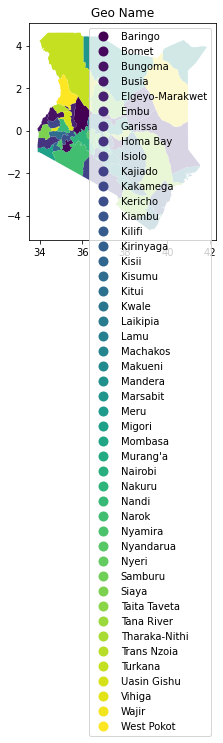

In [46]:
# Load the shapefile (specify the full path if needed)
#gdf = gpd.read_file("data/income_level_data/GSAP_AM24_2021.shp")

# Plot the data
ke_counties.plot(column="geo_name", legend=True, cmap="viridis")
plt.title("Geo Name")
plt.show()

#### **GSAP_AM24_2021.dbf (attributes)**

In [47]:
from simpledbf import Dbf5

PyTables is not installed. No support for HDF output.


In [48]:
# Load the .dbf file
dbf = Dbf5(r"C:\Users\User\Documents\Energy-Access-and-Electrification-planning\data\income_level_data\GSAP_AM24_2021.dbf", codec='latin-1')

df = dbf.to_dataframe()

# View the first few rows
df

,code,geo_year,geo_source,geo_level,geo_idvar,geo_id,geo_nvar,geo_name,geo_code
0,ABW,NaN,NaN,NaN,NaN,NaN,NaN,Aruba (Neth.),ABW_2020_WB0
1,AFG,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan,AFG_2020_WB0
2,AGO,2015.0,GAUL,1,ADM1_CODE,398,ADM1_NAME,Bengo,AGO_2015_GAUL1_398
3,AGO,2015.0,GAUL,1,ADM1_CODE,399,ADM1_NAME,Benguela,AGO_2015_GAUL1_399
4,AGO,2015.0,GAUL,1,ADM1_CODE,400,ADM1_NAME,Bie,AGO_2015_GAUL1_400
...,...,...,...,...,...,...,...,...,...
1830,ZWE,2015.0,GAUL,1,ADM1_CODE,3440,ADM1_NAME,Mashonaland West,ZWE_2015_GAUL1_3440
1831,ZWE,2015.0,GAUL,1,ADM1_CODE,3441,ADM1_NAME,Masvingo,ZWE_2015_GAUL1_3441
1832,ZWE,2015.0,GAUL,1,ADM1_CODE,69549,ADM1_NAME,Matabeleland North,ZWE_2015_GAUL1_69549
1833,ZWE,2015.0,GAUL,1,ADM1_CODE,3443,ADM1_NAME,Matabeleland South,ZWE_2015_GAUL1_3443


#### **GSAP_AM24_2021.gpkg**

#### **GSAP_AM24_2021.shx (shape)**

In [49]:
data = gpd.read_file("..\data\income_level_data\GSAP_AM24_2021.shx", engine="pyogrio")
data.head()

c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\pyogrio\raw.py:196: RuntimeWarning: ..\data\income_level_data\GSAP_AM24_2021.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


,code,geo_year,geo_source,geo_level,geo_idvar,geo_id,geo_nvar,geo_name,geo_code,geometry
0,ABW,NaN,None,None,None,None,None,Aruba (Neth.),ABW_2020_WB0,"POLYGON ((-69.99694 12.57758, -69.93639 12.531..."
1,AFG,NaN,None,None,None,None,None,Afghanistan,AFG_2020_WB0,"POLYGON ((74.54235 37.02167, 74.54742 37.01567..."
2,AGO,2015.0,GAUL,1,ADM1_CODE,398,ADM1_NAME,Bengo,AGO_2015_GAUL1_398,"POLYGON ((13.14401 -9.33313, 13.14405 -9.33316..."
3,AGO,2015.0,GAUL,1,ADM1_CODE,399,ADM1_NAME,Benguela,AGO_2015_GAUL1_399,"POLYGON ((13.79886 -11.77102, 13.79883 -11.771..."
4,AGO,2015.0,GAUL,1,ADM1_CODE,400,ADM1_NAME,Bie,AGO_2015_GAUL1_400,"POLYGON ((16.79741 -10.77021, 16.80907 -10.772..."


#### **GSAP_AM24_2021.prj**

### **4. Population Density Data.**

In [50]:
ke_pop_density= gpd.read_file('..\data\pop_density_data\Kenya_pop_data.csv', engine='pyogrio')
ke_pop_density.head()

,X,Y,Z
0,35.2445831961176026,5.46208351911385481,52.6680107116699219
1,35.2529165294175968,5.46208351911385481,42.5668067932128906
2,35.2612498627175981,5.46208351911385481,39.3040504455566406
3,35.2695831960175994,5.46208351911385481,41.8510665893554688
4,35.2779165293176007,5.46208351911385481,38.2382888793945312


In [ ]:
kenya_pop_density= gpd.read_file('..\data\pop_density_data\pop_density_kenya\ken_pd_2001_1km_ASCII_XYZ.csv', engine='pyogrio')
kenya_pop_density.head()

,X,Y,Z
0,35.2445831961176026,5.46208351911385481,1.39685201644897461
1,35.2529165294175968,5.46208351911385481,1.37266373634338379
2,35.2612498627175981,5.46208351911385481,1.33044469356536865
3,35.2695831960175994,5.46208351911385481,1.38530480861663818
4,35.2779165293176007,5.46208351911385481,1.38312041759490967


In [72]:
ke_pop_density = ke_pop_density.astype({
    'X':float,
    'Y':float,
    'Z':float})

In [73]:
kenya_pop_density = kenya_pop_density.astype({
    'X':float,
    'Y':float,
    'Z':float})

```
ke_pop_density['location'] = ke_pop_density.apply(lambda r: shapely.points(r['X'], r['Y']), axis=1)
ke_pop_density.set_geometry('location')
```


In [52]:
ke_pop_df = gpd.GeoDataFrame(
    ke_pop_density, geometry=gpd.points_from_xy(ke_pop_density.X, ke_pop_density.Y), crs="EPSG:4326"
).drop(columns=['X','Y']).rename(columns={'Z':'Density'})

ke_pop_df.head()

,Density,geometry
0,52.668011,POINT (35.24458 5.46208)
1,42.566807,POINT (35.25292 5.46208)
2,39.304050,POINT (35.26125 5.46208)
3,41.851067,POINT (35.26958 5.46208)
4,38.238289,POINT (35.27792 5.46208)


In [74]:
kenya_pop_df = gpd.GeoDataFrame(
    kenya_pop_density, geometry=gpd.points_from_xy(kenya_pop_density.X, kenya_pop_density.Y), crs="EPSG:4326"
).drop(columns=['X','Y']).rename(columns={'Z':'Density'})

kenya_pop_df.head()

,Density,geometry
0,1.396852,POINT (35.24458 5.46208)
1,1.372664,POINT (35.25292 5.46208)
2,1.330445,POINT (35.26125 5.46208)
3,1.385305,POINT (35.26958 5.46208)
4,1.383120,POINT (35.27792 5.46208)


In [53]:
ke_pop_df.Density.describe(percentiles=[.95])

count    680262.000000
mean         95.214693
std         661.822734
min           0.000000
50%          12.548709
95%         438.835638
max      167454.390625
Name: Density, dtype: float64

In [75]:
kenya_pop_df.Density.describe(percentiles=[.95])

count    680262.000000
mean         52.459902
std         338.698894
min           0.000000
50%           4.307683
95%         261.893431
max       78880.398438
Name: Density, dtype: float64

<Axes: >

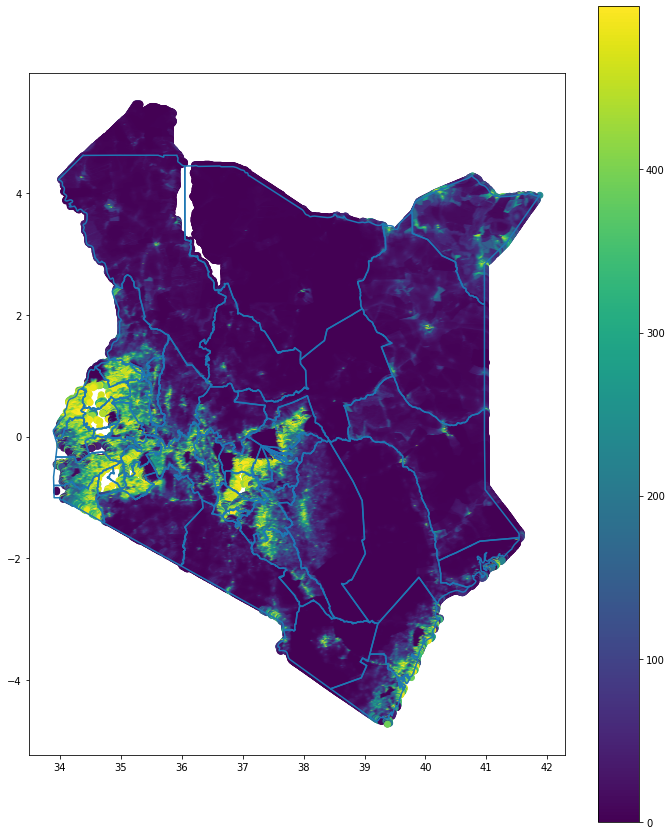

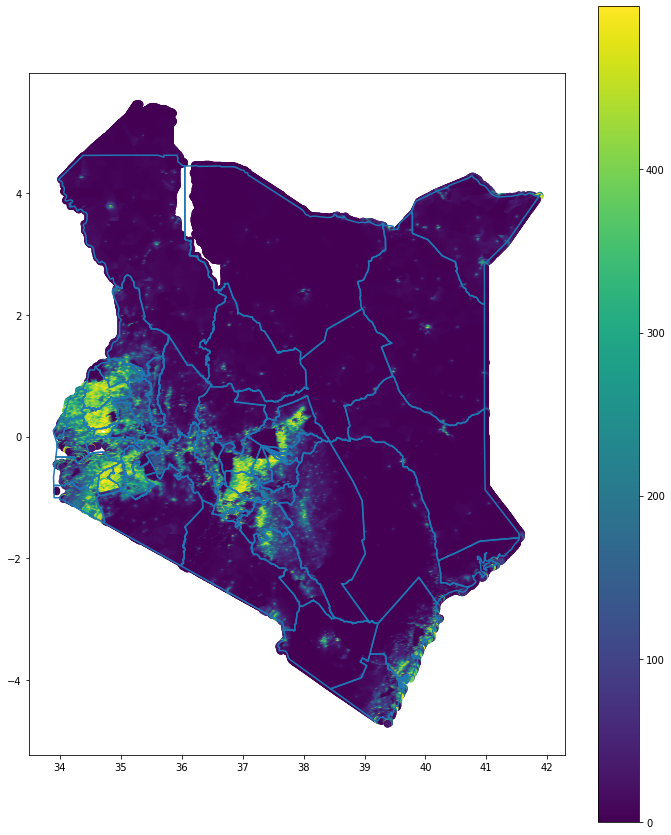

In [76]:
base = ke_counties.boundary.plot(figsize=(12, 15))
ke_pop_df.query('Density<500').plot(ax=base, column='Density', legend=True)

base = ke_counties.boundary.plot(figsize=(12, 15))
kenya_pop_df.query('Density<500').plot(ax=base, column='Density', legend=True)

### **5. Renewable Potential Data**

### Kenya PVOUT

In [55]:
# Define file path
file_path = r'C:\Users\User\Documents\Energy-Access-and-Electrification-planning\data\renewable_potential_data\kenya_renewable_data\Kenya_PVOUT_poster-map_1000x1000mm-300dpi_v20191017.tif'

# Open the .tif file using rasterio
with rasterio.open(file_path) as src:
    raster_data = src.read(1)  # Read the first band
    profile = src.profile     # Get metadata for the file
    print(profile)            # Print profile for metadata inspection

c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 11811, 'height': 11811, 'count': 4, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0), 'blockysize': 1, 'tiled': False, 'compress': 'lzw', 'interleave': 'pixel'}


In [56]:
# Get NoData value from the metadata
nodata_value = profile.get('nodata', -9999)

# Find and count NoData values in the array
nodata_count = np.sum(raster_data == nodata_value)
print(f"NoData values count: {nodata_count}")

NoData values count: 0


In [57]:
# Open the TIFF file
with rasterio.open(r'C:\Users\User\Documents\Energy-Access-and-Electrification-planning\data\renewable_potential_data\kenya_renewable_data\Kenya_PVOUT_poster-map_1000x1000mm-300dpi_v20191017.tif') as src:
    # Print metadata
    print("Metadata:", src.meta)
    
    # Print dimensions (height and width) and number of bands
    print("Dimensions (Height x Width):", src.height, "x", src.width)
    print("Number of Bands:", src.count)
    
    # Print coordinate reference system (CRS)
    print("Coordinate Reference System (CRS):", src.crs)
    
    # Print affine transformation (mapping coordinates to array indices)
    print("Affine Transformation:", src.transform)

    # Read the first band and print a portion of pixel values as an example
    band1 = src.read(1)  # Read the first band
    print("Sample Pixel Values (Top-left corner):\n", band1[:5, :5])

Metadata: {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 11811, 'height': 11811, 'count': 4, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)}
Dimensions (Height x Width): 11811 x 11811
Number of Bands: 4
Coordinate Reference System (CRS): None
Affine Transformation: | 1.00, 0.00, 0.00|
| 0.00, 1.00, 0.00|
| 0.00, 0.00, 1.00|
Sample Pixel Values (Top-left corner):
 [[255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]]


### Kenya Wind Speed

In [58]:
# Define file path
file_path = r'C:\Users\User\Documents\Energy-Access-and-Electrification-planning\data\renewable_potential_data\kenya_renewable_data\kenya_wind-speed_100m.tif'

# Open the .tif file using rasterio
with rasterio.open(file_path) as src:
    raster_data = src.read(1)  # Read the first band
    profile = src.profile     # Get metadata for the file

In [59]:
# Get NoData value from the metadata
nodata_value = profile.get('nodata', -9999)

# Find and count NoData values in the array
nodata_count = np.sum(raster_data == nodata_value)
print(f"NoData values count: {nodata_count}")

NoData values count: 0


In [60]:
# Open the TIFF file
with rasterio.open(r'C:\Users\User\Documents\Energy-Access-and-Electrification-planning\data\renewable_potential_data\kenya_renewable_data\kenya_wind-speed_100m.tif') as src:
    # Print metadata
    print("Metadata:", src.meta)
    
    # Print dimensions (height and width) and number of bands
    print("Dimensions (Height x Width):", src.height, "x", src.width)
    print("Number of Bands:", src.count)
    
    # Print coordinate reference system (CRS)
    print("Coordinate Reference System (CRS):", src.crs)
    
    # Print affine transformation (mapping coordinates to array indices)
    print("Affine Transformation:", src.transform)

    # Read the first band and print a portion of pixel values as an example
    band1 = src.read(1)  # Read the first band
    print("Sample Pixel Values (Top-left corner):\n", band1[:5, :5])

Metadata: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 4149, 'height': 3806, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.002500000000000124, 0.0, 33.906572682195275,
       0.0, -0.002500000000000124, 4.623268747733392)}
Dimensions (Height x Width): 3806 x 4149
Number of Bands: 1
Coordinate Reference System (CRS): EPSG:4326
Affine Transformation: | 0.00, 0.00, 33.91|
| 0.00,-0.00, 4.62|
| 0.00, 0.00, 1.00|
Sample Pixel Values (Top-left corner):
 [[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]


In [61]:
# Check the no data value
no_data_value = src.nodata

# Create a mask for the no data values
masked_data = np.ma.masked_equal(raster_data, no_data_value)

In [62]:
# Calculate statistics
mean_speed = np.mean(masked_data)
median_speed = np.median(masked_data)
std_dev_speed = np.std(masked_data)

print(f'Mean Wind Speed: {mean_speed:.2f} m/s')
print(f'Median Wind Speed: {median_speed:.2f} m/s')
print(f'Standard Deviation: {std_dev_speed:.2f} m/s')

Mean Wind Speed: nan m/s
Median Wind Speed: nan m/s
Standard Deviation: -- m/s


c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
<ipython-input-62-d9d7f818602f>:8: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  print(f'Standard Deviation: {std_dev_speed:.2f} m/s')


### Plotting the Wind Speed Data
Use matplotlib to visualize the wind speed:

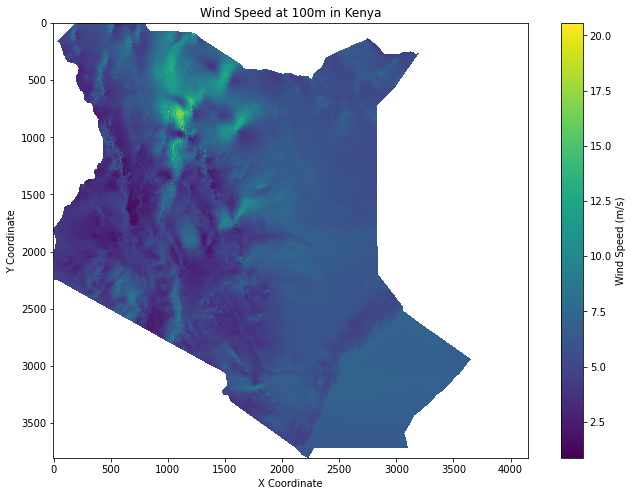

In [63]:
plt.figure(figsize=(12, 8))
plt.title('Wind Speed at 100m in Kenya')
plt.imshow(masked_data, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Wind Speed (m/s)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(False)
plt.show()

### Histograms of Wind Speed
Visualizing the distribution of wind speeds can be helpful:

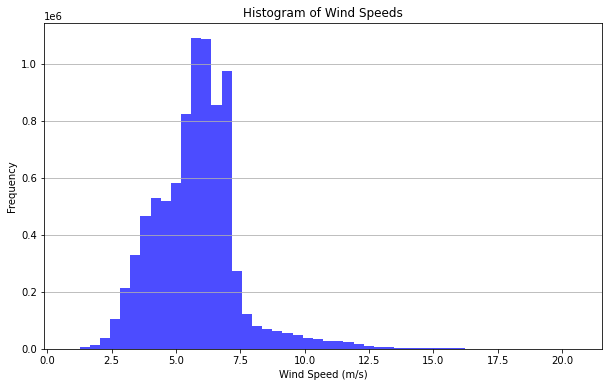

In [64]:
plt.figure(figsize=(10, 6))
plt.hist(masked_data.compressed(), bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Wind Speeds')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

In [65]:
# Create a DataFrame for statistics
stats_df = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Std Dev'],
    'Value': [mean_speed, median_speed, std_dev_speed]
})

# Save to CSV
stats_df.to_csv('wind_speed_statistics.csv', index=False)

###  Identifying High Wind Speed Areas
You can identify areas with high average wind speeds, which may be potential sites for wind energy development:

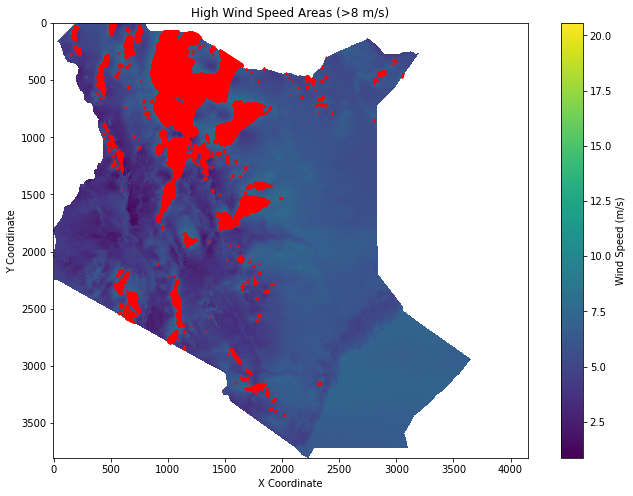

In [66]:
# Define a threshold for high wind speed
high_wind_threshold = 8  # m/s, adjust based on your criteria
high_wind_areas = np.where(masked_data > high_wind_threshold)

# Plot high wind areas
plt.figure(figsize=(12, 8))
plt.imshow(masked_data, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Wind Speed (m/s)')
plt.scatter(high_wind_areas[1], high_wind_areas[0], color='red', s=1)  # s is the size of points
plt.title('High Wind Speed Areas (>8 m/s)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(False)
plt.show()

### Calculate Wind Speed Variability
Assess the variability of wind speeds across different regions. You can compute local statistics using moving windows or zonal statistics: